<a href="https://colab.research.google.com/github/josephalanis/ADS/blob/main/Ads_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

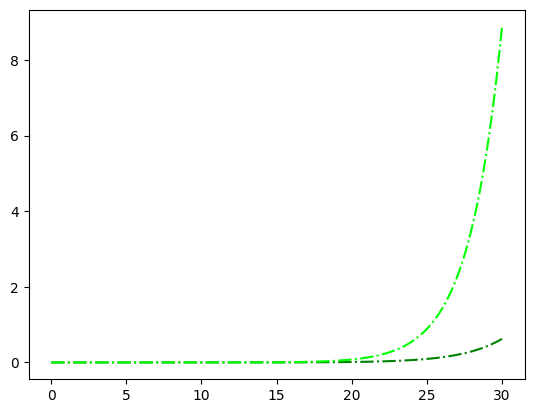

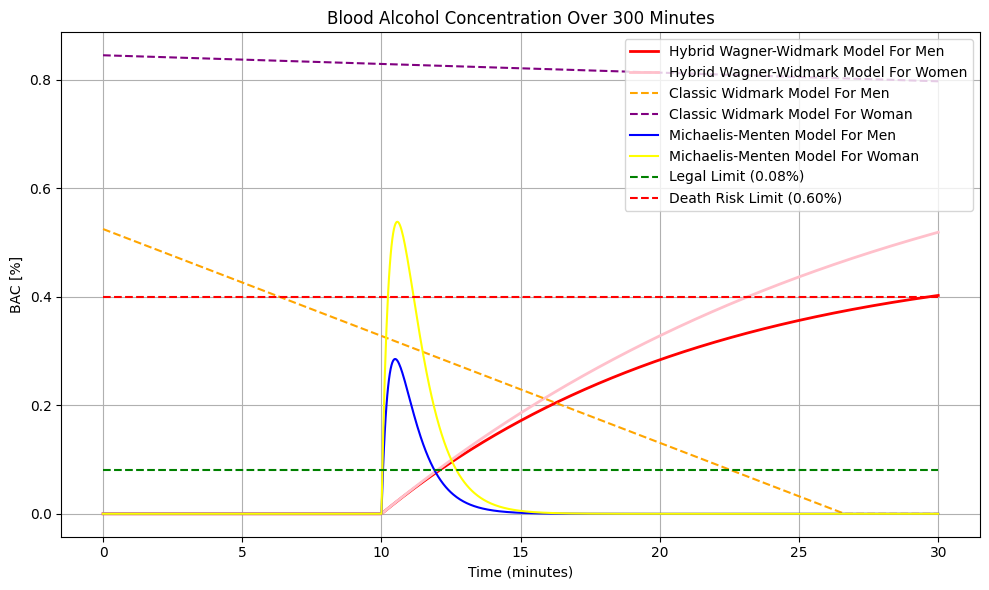

=== Hybrid Wagner-Widmark Model ===

=== Men ===
Time when BAC exceeds legal limit for men: 12.10 minutes
Time when BAC exceeds death risk limit for men: 29.70 minutes
Time of peak BAC for man: 30.00 minutes
Peak BAC value for men: 0.40%

=== Women ===
Time when BAC exceeds legal limit for women: 12.10 minutes
Time when BAC exceeds death risk limit for women: 29.70 minutes
Time of peak BAC for woman: 30.00 minutes
Peak BAC value for women: 0.52%

=== Michaelis-Menten Model ===

=== Men ===
Time when BAC_KM exceeds legal limit for men: 10.06 minutes
BAC_KM never exceeds the death risk limit for men.
Time of peak BAC_KM for men: 10.48 minutes
Peak BAC_KM value for men: 0.29%

=== Women ===
Time when BAC_KM exceeds legal limit for men: 10.06 minutes
Time when BAC_KM exceeds death risk limit for women: 10.24 minutes
Time of peak BAC_KM for womanmen: 10.57 minutes
Peak BAC_KM value for woman: 0.54%


In [1]:
#Sceanrio 1 for men and woman
import numpy as np
import matplotlib.pyplot as plt

# General Parameters
A0 = 336.002 # grams of concentration [g per ethonol]
t0 = 10  # absorption delay [min]

# Parameters for men

ka = 0.08   # absorption rate constant [1/min]
ke = 0.0032  # elimination rate constant [1/min]
beta = 0.197  # metabolism rate [g/L/min]
Vd = 64.04  # volume of distribution in Liters


# Michaelis-Menten parameters for men
K = 3.105            # Decay rate for A_s
vmax = 0.470          # maximal rate [g/L/min]
KM = 0.38           # Michaelis-Menten constant [g/L]


# Parameters for women

ka_1 = 0.05   # absorption rate constant [1/min]
ke_1 = 0.0025  # elimination rate constant [1/min]
beta_1 = 0.016  # metabolism rate [g/L/min]
Vd_1 = 39.77  # volume of distribution in Liters


# Michaelis-Menten parameters for women
K_1 = 2.48            # Decay rate for A_s
vmax_1 = 0.48          # maximal rate [g/L/min]
KM_1 = 0.405           # Michaelis-Menten constant [g/L]


# Time array: simulate over 300 minutes
t = np.linspace(0, 30, 1000)

# Heaviside function for absorption start at t0
H = np.heaviside(t - t0, 1)

# Hybrid Wagner-Widmark model with delay for men
BAC = (1/10)*(
    (ka * A0 / (Vd * (ke - ka))) * (np.exp(-ka * (t - t0)) - np.exp(-ke * (t - t0))) * H
)

# Hybrid Wagner-Widmark model with delay for woman
BAC_1 = (1/10)*(
    (ka_1 * A0 / (Vd_1 * (ke_1 - ka_1))) * (np.exp(-ka_1 * (t - t0)) - np.exp(-ke_1 * (t - t0))) * H
)


# Classic Widmark model (instant absorption)for men
widmark_BAC = (1/10)* ((A0 / Vd) - beta * t)
widmark_BAC[widmark_BAC < 0] = 0


# Classic Widmark model (instant absorption)for woman
widmark_BAC_1 = (1/10)*((A0 / Vd_1) - beta_1 * t)
widmark_BAC_1[widmark_BAC_1 < 0] = 0

# Michaelis-Menten based BAC model for men
t_shifted = np.maximum(t - t0, 0)  # shifted time
bac_km = (1/10)*(((A0*K) / (Vd*((vmax/KM)-K))) * ( np.exp(-K * (t - t0))- np.exp((-vmax/KM) * (t - t0))))*H

# Set negative BACs to zero (physical constraint)
bac_km[bac_km < 0] = 0

# Michaelis-Menten based BAC model for woman
bac_km_1 = (1/10)*(((A0*K) / (Vd_1*((vmax_1/KM_1)-K_1))) * ( np.exp(-K_1 * (t - t0))- np.exp((-vmax_1/KM_1) * (t - t0))))*H

# Set negative BACs to zero (physical constraint)
bac_km_1[bac_km_1 < 0] = 0


# Legal and Death limit lines
legal_limit = 0.08 * np.ones_like(t)
death_limit = 0.4 * np.ones_like(t)

# Men
BAC_KM_star = (KM**2 / (10 * Vd * vmax * K**2)) * t_shifted * np.exp(t_shifted / K) * H

# Women
BAC_KM_star_1 = (KM_1**2 / (10 * Vd_1 * vmax_1 * K_1**2)) * t_shifted * np.exp(t_shifted / K_1) * H

# Add to plot
plt.plot(t, BAC_KM_star, label="Outer BAC$_{K_M*}$ Model (Men)", color='green', linestyle='-.')
plt.plot(t, BAC_KM_star_1, label="Outer BAC$_{K_M*}$ Model (Women)", color='lime', linestyle='-.')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, BAC, label="Hybrid Wagner-Widmark Model For Men", linewidth=2,color='red')
plt.plot(t, BAC_1, label="Hybrid Wagner-Widmark Model For Women", linewidth=2,color='pink')
plt.plot(t, widmark_BAC, label="Classic Widmark Model For Men", linestyle='--', color='orange')
plt.plot(t, widmark_BAC_1, label="Classic Widmark Model For Woman", linestyle='--', color='purple')
plt.plot(t, bac_km, label="Michaelis-Menten Model For Men", color='blue')
plt.plot(t, bac_km_1, label="Michaelis-Menten Model For Woman", color='yellow')
plt.plot(t, legal_limit, 'g--', label="Legal Limit (0.08%)")
plt.plot(t, death_limit, 'r--', label="Death Risk Limit (0.60%)")
plt.xlabel("Time (minutes)")
plt.ylabel("BAC [%]")
plt.title("Blood Alcohol Concentration Over 300 Minutes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Analysis for BAC ---
crossings_BAC = np.where(BAC >= 0.08)[0]
crossings_BAC_1 = np.where(BAC >= 0.08)[0]
crossings_BAC_death = np.where(BAC >= 0.4)[0]
crossings_BAC_death_1 = np.where(BAC >= 0.4)[0]
time_above_legal_BAC = t[crossings_BAC[0]] if len(crossings_BAC) > 0 else None
time_above_legal_BAC_1 = t[crossings_BAC_1[0]] if len(crossings_BAC_1) > 0 else None
time_til_death_BAC = t[crossings_BAC_death[0]] if len(crossings_BAC_death) > 0 else None
time_til_death_BAC_1 = t[crossings_BAC_death_1[0]] if len(crossings_BAC_death_1) > 0 else None
time_to_peak_BAC = t[np.argmax(BAC)]
peak_BAC = np.max(BAC)
time_to_peak_BAC_1 = t[np.argmax(BAC_1)]
peak_BAC_1 = np.max(BAC_1)


# --- Analysis for BAC_KM ---
crossings_BAC_KM = np.where(bac_km >= 0.08)[0]
crossings_BAC_KM_1 = np.where(bac_km_1 >= 0.08)[0]
crossings_BAC_KM_death = np.where(bac_km >= 0.4)[0]
crossings_BAC_KM_death_1 = np.where(bac_km_1 >= 0.4)[0]
time_above_legal_BAC_KM = t[crossings_BAC_KM[0]] if len(crossings_BAC_KM) > 0 else None
time_above_legal_BAC_KM_1 = t[crossings_BAC_KM_1[0]] if len(crossings_BAC_KM_1) > 0 else None
time_til_death_BAC_KM = t[crossings_BAC_KM_death[0]] if len(crossings_BAC_KM_death) > 0 else None
time_til_death_BAC_KM_1 = t[crossings_BAC_KM_death_1[0]] if len(crossings_BAC_KM_death_1) > 0 else None
time_to_peak_BAC_KM = t[np.argmax(bac_km)]
peak_BAC_KM = np.max(bac_km)
time_to_peak_BAC_KM_1 = t[np.argmax(bac_km_1)]
peak_BAC_KM_1 = np.max(bac_km_1)


# --- Printing results ---
print("=== Hybrid Wagner-Widmark Model ===")
print("\n=== Men ===")
if time_above_legal_BAC is not None:
    print(f"Time when BAC exceeds legal limit for men: {time_above_legal_BAC:.2f} minutes")
else:
    print("BAC never exceeds the legal limit.")

if time_til_death_BAC is not None:
    print(f"Time when BAC exceeds death risk limit for men: {time_til_death_BAC:.2f} minutes")
else:
    print("BAC never exceeds the death risk limit.")

print(f"Time of peak BAC for man: {time_to_peak_BAC:.2f} minutes")
print(f"Peak BAC value for men: {peak_BAC:.2f}%")

#for woman
print("\n=== Women ===")
if time_above_legal_BAC_1 is not None:
    print(f"Time when BAC exceeds legal limit for women: {time_above_legal_BAC_1:.2f} minutes")
else:
    print("BAC never exceeds the legal limit.")

if time_til_death_BAC_1 is not None:
    print(f"Time when BAC exceeds death risk limit for women: {time_til_death_BAC_1:.2f} minutes")
else:
    print("BAC never exceeds the death risk limit for women:.")

print(f"Time of peak BAC for woman: {time_to_peak_BAC_1:.2f} minutes")
print(f"Peak BAC value for women: {peak_BAC_1:.2f}%")

print("\n=== Michaelis-Menten Model ===")
print("\n=== Men ===")
if time_above_legal_BAC_KM is not None:
    print(f"Time when BAC_KM exceeds legal limit for men: {time_above_legal_BAC_KM:.2f} minutes")
else:
    print("BAC_KM never exceeds the legal limit for men.")

if time_til_death_BAC_KM is not None:
    print(f"Time when BAC_KM exceeds death risk limit for men: {time_til_death_BAC_KM:.2f} minutes")
else:
    print("BAC_KM never exceeds the death risk limit for men.")

print(f"Time of peak BAC_KM for men: {time_to_peak_BAC_KM:.2f} minutes")
print(f"Peak BAC_KM value for men: {peak_BAC_KM:.2f}%")

#for woman
print("\n=== Women ===")
if time_above_legal_BAC_KM_1 is not None:
    print(f"Time when BAC_KM exceeds legal limit for men: {time_above_legal_BAC_KM_1:.2f} minutes")
else:
    print("BAC_KM never exceeds the legal limit for men.")

if time_til_death_BAC_KM_1 is not None:
    print(f"Time when BAC_KM exceeds death risk limit for women: {time_til_death_BAC_KM_1:.2f} minutes")
else:
    print("BAC_KM never exceeds the death risk limit for women.")

print(f"Time of peak BAC_KM for womanmen: {time_to_peak_BAC_KM_1:.2f} minutes")
print(f"Peak BAC_KM value for woman: {peak_BAC_KM_1:.2f}%")


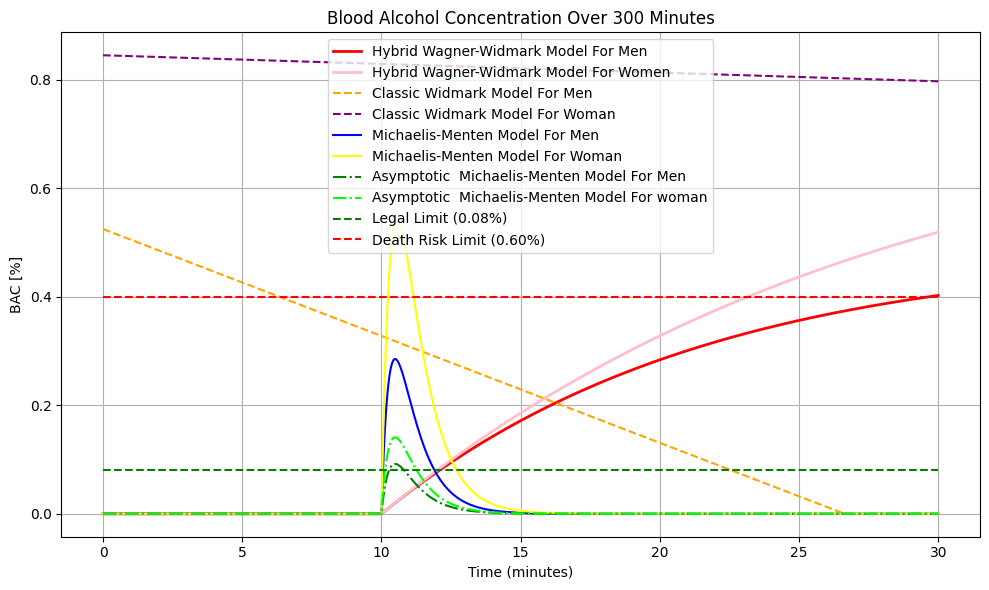

=== Hybrid Wagner-Widmark Model ===

=== Men ===
Time when BAC exceeds legal limit for men: 12.10 minutes
Time when BAC exceeds death risk limit for men: 29.70 minutes
Time of peak BAC for man: 30.00 minutes
Peak BAC value for men: 0.40%

=== Women ===
Time when BAC exceeds legal limit for women: 12.10 minutes
Time when BAC exceeds death risk limit for women: 29.70 minutes
Time of peak BAC for woman: 30.00 minutes
Peak BAC value for women: 0.52%

=== Michaelis-Menten Model ===

=== Men ===
Time when BAC_KM exceeds legal limit for men: 10.06 minutes
BAC_KM never exceeds the death risk limit for men.
Time of peak BAC_KM for men: 10.48 minutes
Peak BAC_KM value for men: 0.29%

=== Women ===
Time when BAC_KM exceeds legal limit for men: 10.06 minutes
Time when BAC_KM exceeds death risk limit for women: 10.24 minutes
Time of peak BAC_KM for womanmen: 10.57 minutes
Peak BAC_KM value for woman: 0.54%


In [ ]:
#Sceanrio 1 for men and woman
import numpy as np
import matplotlib.pyplot as plt

# General Parameters
A0 = 336.002 # grams of concentration [g per ethonol]
t0 = 10  # absorption delay [min]

# Parameters for men

ka = 0.08   # absorption rate constant [1/min]
ke = 0.0032  # elimination rate constant [1/min]
beta = 0.197  # metabolism rate [g/L/min]
Vd = 64.04  # volume of distribution in Liters


# Michaelis-Menten parameters for men
K = 3.105            # Decay rate for A_s
vmax = 0.470          # maximal rate [g/L/min]
KM = 0.38           # Michaelis-Menten constant [g/L]


# Parameters for women

ka_1 = 0.05   # absorption rate constant [1/min]
ke_1 = 0.0025  # elimination rate constant [1/min]
beta_1 = 0.016  # metabolism rate [g/L/min]
Vd_1 = 39.77  # volume of distribution in Liters


# Michaelis-Menten parameters for women
K_1 = 2.48            # Decay rate for A_s
vmax_1 = 0.48          # maximal rate [g/L/min]
KM_1 = 0.405           # Michaelis-Menten constant [g/L]


# Time array: simulate over 300 minutes
t = np.linspace(0, 30, 1000)

# Heaviside function for absorption start at t0
H = np.heaviside(t - t0, 1)

# Hybrid Wagner-Widmark model with delay for men
BAC = (1/10)*(
    (ka * A0 / (Vd * (ke - ka))) * (np.exp(-ka * (t - t0)) - np.exp(-ke * (t - t0))) * H
)

# Hybrid Wagner-Widmark model with delay for woman
BAC_1 = (1/10)*(
    (ka_1 * A0 / (Vd_1 * (ke_1 - ka_1))) * (np.exp(-ka_1 * (t - t0)) - np.exp(-ke_1 * (t - t0))) * H
)


# Classic Widmark model (instant absorption)for men
widmark_BAC = (1/10)* ((A0 / Vd) - beta * t)
widmark_BAC[widmark_BAC < 0] = 0


# Classic Widmark model (instant absorption)for woman
widmark_BAC_1 = (1/10)*((A0 / Vd_1) - beta_1 * t)
widmark_BAC_1[widmark_BAC_1 < 0] = 0

# Michaelis-Menten based BAC model for men
t_shifted = np.maximum(t - t0, 0)  # shifted time
bac_km = (1/10)*(((A0*K) / (Vd*((vmax/KM)-K))) * ( np.exp(-K * (t - t0))- np.exp((-vmax/KM) * (t - t0))))*H

# Set negative BACs to zero (physical constraint)
bac_km[bac_km < 0] = 0

# Michaelis-Menten based BAC model for woman
bac_km_1 = (1/10)*(((A0*K) / (Vd_1*((vmax_1/KM_1)-K_1))) * ( np.exp(-K_1 * (t - t0))- np.exp((-vmax_1/KM_1) * (t - t0))))*H

# Set negative BACs to zero (physical constraint)
bac_km_1[bac_km_1 < 0] = 0


# Legal and Death limit lines
legal_limit = 0.08 * np.ones_like(t)
death_limit = 0.4 * np.ones_like(t)

# Men
BAC_KM_star = (1/10)*((A0*KM) / (Vd*(vmax-(KM*K))) * ( np.exp(-K * (t - t0))- np.exp((-(vmax)/KM) * (t - t0))))*H

# Women
BAC_KM_star_1 = (1/10)*(((A0*KM_1) / (Vd_1*(vmax_1-(KM_1*K)))) * ( np.exp(-K * (t - t0))- np.exp((-(vmax_1)/KM) * (t - t0))))*H

# Add to plot


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, BAC, label="Hybrid Wagner-Widmark Model For Men", linewidth=2,color='red')
plt.plot(t, BAC_1, label="Hybrid Wagner-Widmark Model For Women", linewidth=2,color='pink')
plt.plot(t, widmark_BAC, label="Classic Widmark Model For Men", linestyle='--', color='orange')
plt.plot(t, widmark_BAC_1, label="Classic Widmark Model For Woman", linestyle='--', color='purple')
plt.plot(t, bac_km, label="Michaelis-Menten Model For Men", color='blue')
plt.plot(t, bac_km_1, label="Michaelis-Menten Model For Woman", color='yellow')
plt.plot(t, BAC_KM_star, label="Asymptotic  Michaelis-Menten Model For Men", color='green', linestyle='-.')
plt.plot(t, BAC_KM_star_1, label="Asymptotic  Michaelis-Menten Model For woman", color='lime', linestyle='-.')
plt.plot(t, legal_limit, 'g--', label="Legal Limit (0.08%)")
plt.plot(t, death_limit, 'r--', label="Death Risk Limit (0.60%)")
plt.xlabel("Time (minutes)")
plt.ylabel("BAC [%]")
plt.title("Blood Alcohol Concentration Over 300 Minutes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Analysis for BAC ---
crossings_BAC = np.where(BAC >= 0.08)[0]
crossings_BAC_1 = np.where(BAC >= 0.08)[0]
crossings_BAC_death = np.where(BAC >= 0.4)[0]
crossings_BAC_death_1 = np.where(BAC >= 0.4)[0]
time_above_legal_BAC = t[crossings_BAC[0]] if len(crossings_BAC) > 0 else None
time_above_legal_BAC_1 = t[crossings_BAC_1[0]] if len(crossings_BAC_1) > 0 else None
time_til_death_BAC = t[crossings_BAC_death[0]] if len(crossings_BAC_death) > 0 else None
time_til_death_BAC_1 = t[crossings_BAC_death_1[0]] if len(crossings_BAC_death_1) > 0 else None
time_to_peak_BAC = t[np.argmax(BAC)]
peak_BAC = np.max(BAC)
time_to_peak_BAC_1 = t[np.argmax(BAC_1)]
peak_BAC_1 = np.max(BAC_1)


# --- Analysis for BAC_KM ---
crossings_BAC_KM = np.where(bac_km >= 0.08)[0]
crossings_BAC_KM_1 = np.where(bac_km_1 >= 0.08)[0]
crossings_BAC_KM_death = np.where(bac_km >= 0.4)[0]
crossings_BAC_KM_death_1 = np.where(bac_km_1 >= 0.4)[0]
time_above_legal_BAC_KM = t[crossings_BAC_KM[0]] if len(crossings_BAC_KM) > 0 else None
time_above_legal_BAC_KM_1 = t[crossings_BAC_KM_1[0]] if len(crossings_BAC_KM_1) > 0 else None
time_til_death_BAC_KM = t[crossings_BAC_KM_death[0]] if len(crossings_BAC_KM_death) > 0 else None
time_til_death_BAC_KM_1 = t[crossings_BAC_KM_death_1[0]] if len(crossings_BAC_KM_death_1) > 0 else None
time_to_peak_BAC_KM = t[np.argmax(bac_km)]
peak_BAC_KM = np.max(bac_km)
time_to_peak_BAC_KM_1 = t[np.argmax(bac_km_1)]
peak_BAC_KM_1 = np.max(bac_km_1)


# --- Printing results ---
print("=== Hybrid Wagner-Widmark Model ===")
print("\n=== Men ===")
if time_above_legal_BAC is not None:
    print(f"Time when BAC exceeds legal limit for men: {time_above_legal_BAC:.2f} minutes")
else:
    print("BAC never exceeds the legal limit.")

if time_til_death_BAC is not None:
    print(f"Time when BAC exceeds death risk limit for men: {time_til_death_BAC:.2f} minutes")
else:
    print("BAC never exceeds the death risk limit.")

print(f"Time of peak BAC for man: {time_to_peak_BAC:.2f} minutes")
print(f"Peak BAC value for men: {peak_BAC:.2f}%")

#for woman
print("\n=== Women ===")
if time_above_legal_BAC_1 is not None:
    print(f"Time when BAC exceeds legal limit for women: {time_above_legal_BAC_1:.2f} minutes")
else:
    print("BAC never exceeds the legal limit.")

if time_til_death_BAC_1 is not None:
    print(f"Time when BAC exceeds death risk limit for women: {time_til_death_BAC_1:.2f} minutes")
else:
    print("BAC never exceeds the death risk limit for women:.")

print(f"Time of peak BAC for woman: {time_to_peak_BAC_1:.2f} minutes")
print(f"Peak BAC value for women: {peak_BAC_1:.2f}%")

print("\n=== Michaelis-Menten Model ===")
print("\n=== Men ===")
if time_above_legal_BAC_KM is not None:
    print(f"Time when BAC_KM exceeds legal limit for men: {time_above_legal_BAC_KM:.2f} minutes")
else:
    print("BAC_KM never exceeds the legal limit for men.")

if time_til_death_BAC_KM is not None:
    print(f"Time when BAC_KM exceeds death risk limit for men: {time_til_death_BAC_KM:.2f} minutes")
else:
    print("BAC_KM never exceeds the death risk limit for men.")

print(f"Time of peak BAC_KM for men: {time_to_peak_BAC_KM:.2f} minutes")
print(f"Peak BAC_KM value for men: {peak_BAC_KM:.2f}%")

#for woman
print("\n=== Women ===")
if time_above_legal_BAC_KM_1 is not None:
    print(f"Time when BAC_KM exceeds legal limit for men: {time_above_legal_BAC_KM_1:.2f} minutes")
else:
    print("BAC_KM never exceeds the legal limit for men.")

if time_til_death_BAC_KM_1 is not None:
    print(f"Time when BAC_KM exceeds death risk limit for women: {time_til_death_BAC_KM_1:.2f} minutes")
else:
    print("BAC_KM never exceeds the death risk limit for women.")

print(f"Time of peak BAC_KM for womanmen: {time_to_peak_BAC_KM_1:.2f} minutes")
print(f"Peak BAC_KM value for woman: {peak_BAC_KM_1:.2f}%")


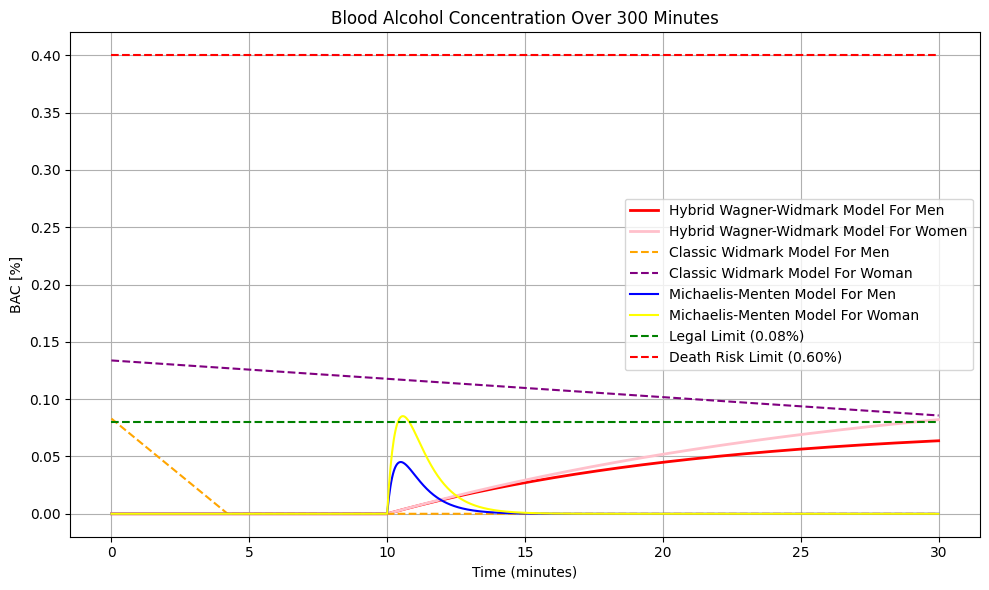

=== Hybrid Wagner-Widmark Model ===

=== Men ===
BAC never exceeds the legal limit.
BAC never exceeds the death risk limit.
Time of peak BAC for man: 30.00 minutes
Peak BAC value for men: 0.06%

=== Women ===
BAC never exceeds the legal limit.
BAC never exceeds the death risk limit for women:.
Time of peak BAC for woman: 30.00 minutes
Peak BAC value for women: 0.08%

=== Michaelis-Menten Model ===

=== Men ===
BAC_KM never exceeds the legal limit for men.
BAC_KM never exceeds the death risk limit for men.
Time of peak BAC_KM for men: 10.48 minutes
Peak BAC_KM value for men: 0.05%

=== Women ===
Time when BAC_KM exceeds legal limit for men: 10.39 minutes
BAC_KM never exceeds the death risk limit for women.
Time of peak BAC_KM for woman: 10.57 minutes
Peak BAC_KM value for woman: 0.09%


In [ ]:
#Sceanrio 2 for men and woman
import numpy as np
import matplotlib.pyplot as plt

# General Parameters
A0 = 53.2 # grams of concentration [g]
t0 = 10  # absorption delay [min]

# Parameters for men

ka = 0.08   # absorption rate constant [1/min]
ke = 0.0032  # elimination rate constant [1/min]
beta = 0.197  # metabolism rate [g/L/min]
Vd = 64.04  # volume of distribution in Liters


# Michaelis-Menten parameters for men
K = 3.105            # Decay rate for A_s
vmax = 0.470          # maximal rate [g/L/min]
KM = 0.38           # Michaelis-Menten constant [g/L]


# Parameters for women

ka_1 = 0.05   # absorption rate constant [1/min]
ke_1 = 0.0025  # elimination rate constant [1/min]
beta_1 = 0.016  # metabolism rate [g/L/min]
Vd_1 = 39.77  # volume of distribution in Liters


# Michaelis-Menten parameters for women
K_1 = 2.48            # Decay rate for A_s
vmax_1 = 0.48          # maximal rate [g/L/min]
KM_1 = 0.405           # Michaelis-Menten constant [g/L]




# Time array: simulate over 300 minutes
t = np.linspace(0, 30, 1000)

# Heaviside function for absorption start at t0
H = np.heaviside(t - t0, 1)

# Hybrid Wagner-Widmark model with delay for men
BAC = (1/10)*(
    (ka * A0 / (Vd * (ke - ka))) * (np.exp(-ka * (t - t0)) - np.exp(-ke * (t - t0))) * H
)

# Hybrid Wagner-Widmark model with delay for woman
BAC_1 = (1/10)*(
    (ka_1 * A0 / (Vd_1 * (ke_1 - ka_1))) * (np.exp(-ka_1 * (t - t0)) - np.exp(-ke_1 * (t - t0))) * H
)


# Classic Widmark model (instant absorption)for men
widmark_BAC = (1/10)* ((A0 / Vd) - beta * t)
widmark_BAC[widmark_BAC < 0] = 0


# Classic Widmark model (instant absorption)for woman
widmark_BAC_1 = (1/10)*((A0 / Vd_1) - beta_1 * t)
widmark_BAC_1[widmark_BAC_1 < 0] = 0

# Michaelis-Menten based BAC model for men
t_shifted = np.maximum(t - t0, 0)  # shifted time
bac_km = (1/10)*(((A0*K) / (Vd*((vmax/KM)-K))) * ( np.exp(-K * (t - t0))- np.exp((-vmax/KM) * (t - t0))))*H

# Set negative BACs to zero (physical constraint)
bac_km[bac_km < 0] = 0

# Michaelis-Menten based BAC model for woman
bac_km_1 = (1/10)*(((A0*K) / (Vd_1*((vmax_1/KM_1)-K_1))) * ( np.exp(-K_1 * (t - t0))- np.exp((-vmax_1/KM_1) * (t - t0))))*H

# Set negative BACs to zero (physical constraint)
bac_km_1[bac_km_1 < 0] = 0


# Legal and Death limit lines
legal_limit = 0.08 * np.ones_like(t)
death_limit = 0.4 * np.ones_like(t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, BAC, label="Hybrid Wagner-Widmark Model For Men", linewidth=2,color='red')
plt.plot(t, BAC_1, label="Hybrid Wagner-Widmark Model For Women", linewidth=2,color='pink')
plt.plot(t, widmark_BAC, label="Classic Widmark Model For Men", linestyle='--', color='orange')
plt.plot(t, widmark_BAC_1, label="Classic Widmark Model For Woman", linestyle='--', color='purple')
plt.plot(t, bac_km, label="Michaelis-Menten Model For Men", color='blue')
plt.plot(t, bac_km_1, label="Michaelis-Menten Model For Woman", color='yellow')
plt.plot(t, legal_limit, 'g--', label="Legal Limit (0.08%)")
plt.plot(t, death_limit, 'r--', label="Death Risk Limit (0.60%)")
plt.xlabel("Time (minutes)")
plt.ylabel("BAC [%]")
plt.title("Blood Alcohol Concentration Over 300 Minutes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Analysis for BAC ---
crossings_BAC = np.where(BAC >= 0.08)[0]
crossings_BAC_1 = np.where(BAC >= 0.08)[0]
crossings_BAC_death = np.where(BAC >= 0.4)[0]
crossings_BAC_death_1 = np.where(BAC >= 0.4)[0]
time_above_legal_BAC = t[crossings_BAC[0]] if len(crossings_BAC) > 0 else None
time_above_legal_BAC_1 = t[crossings_BAC_1[0]] if len(crossings_BAC_1) > 0 else None
time_til_death_BAC = t[crossings_BAC_death[0]] if len(crossings_BAC_death) > 0 else None
time_til_death_BAC_1 = t[crossings_BAC_death_1[0]] if len(crossings_BAC_death_1) > 0 else None
time_to_peak_BAC = t[np.argmax(BAC)]
peak_BAC = np.max(BAC)
time_to_peak_BAC_1 = t[np.argmax(BAC_1)]
peak_BAC_1 = np.max(BAC_1)


# --- Analysis for BAC_KM ---
crossings_BAC_KM = np.where(bac_km >= 0.08)[0]
crossings_BAC_KM_1 = np.where(bac_km_1 >= 0.08)[0]
crossings_BAC_KM_death = np.where(bac_km >= 0.4)[0]
crossings_BAC_KM_death_1 = np.where(bac_km_1 >= 0.4)[0]
time_above_legal_BAC_KM = t[crossings_BAC_KM[0]] if len(crossings_BAC_KM) > 0 else None
time_above_legal_BAC_KM_1 = t[crossings_BAC_KM_1[0]] if len(crossings_BAC_KM_1) > 0 else None
time_til_death_BAC_KM = t[crossings_BAC_KM_death[0]] if len(crossings_BAC_KM_death) > 0 else None
time_til_death_BAC_KM_1 = t[crossings_BAC_KM_death_1[0]] if len(crossings_BAC_KM_death_1) > 0 else None
time_to_peak_BAC_KM = t[np.argmax(bac_km)]
peak_BAC_KM = np.max(bac_km)
time_to_peak_BAC_KM_1 = t[np.argmax(bac_km_1)]
peak_BAC_KM_1 = np.max(bac_km_1)


# --- Printing results ---
print("=== Hybrid Wagner-Widmark Model ===")
print("\n=== Men ===")
if time_above_legal_BAC is not None:
    print(f"Time when BAC exceeds legal limit for men: {time_above_legal_BAC:.2f} minutes")
else:
    print("BAC never exceeds the legal limit.")

if time_til_death_BAC is not None:
    print(f"Time when BAC exceeds death risk limit for men: {time_til_death_BAC:.2f} minutes")
else:
    print("BAC never exceeds the death risk limit.")

print(f"Time of peak BAC for man: {time_to_peak_BAC:.2f} minutes")
print(f"Peak BAC value for men: {peak_BAC:.2f}%")

#for woman
print("\n=== Women ===")
if time_above_legal_BAC_1 is not None:
    print(f"Time when BAC exceeds legal limit for women: {time_above_legal_BAC_1:.2f} minutes")
else:
    print("BAC never exceeds the legal limit.")

if time_til_death_BAC_1 is not None:
    print(f"Time when BAC exceeds death risk limit for women: {time_til_death_BAC_1:.2f} minutes")
else:
    print("BAC never exceeds the death risk limit for women:.")

print(f"Time of peak BAC for woman: {time_to_peak_BAC_1:.2f} minutes")
print(f"Peak BAC value for women: {peak_BAC_1:.2f}%")

print("\n=== Michaelis-Menten Model ===")
print("\n=== Men ===")
if time_above_legal_BAC_KM is not None:
    print(f"Time when BAC_KM exceeds legal limit for men: {time_above_legal_BAC_KM:.2f} minutes")
else:
    print("BAC_KM never exceeds the legal limit for men.")

if time_til_death_BAC_KM is not None:
    print(f"Time when BAC_KM exceeds death risk limit for men: {time_til_death_BAC_KM:.2f} minutes")
else:
    print("BAC_KM never exceeds the death risk limit for men.")

print(f"Time of peak BAC_KM for men: {time_to_peak_BAC_KM:.2f} minutes")
print(f"Peak BAC_KM value for men: {peak_BAC_KM:.2f}%")

#for woman
print("\n=== Women ===")
if time_above_legal_BAC_KM_1 is not None:
    print(f"Time when BAC_KM exceeds legal limit for men: {time_above_legal_BAC_KM_1:.2f} minutes")
else:
    print("BAC_KM never exceeds the legal limit for men.")

if time_til_death_BAC_KM_1 is not None:
    print(f"Time when BAC_KM exceeds death risk limit for women: {time_til_death_BAC_KM_1:.2f} minutes")
else:
    print("BAC_KM never exceeds the death risk limit for women.")

print(f"Time of peak BAC_KM for woman: {time_to_peak_BAC_KM_1:.2f} minutes")
print(f"Peak BAC_KM value for woman: {peak_BAC_KM_1:.2f}%")


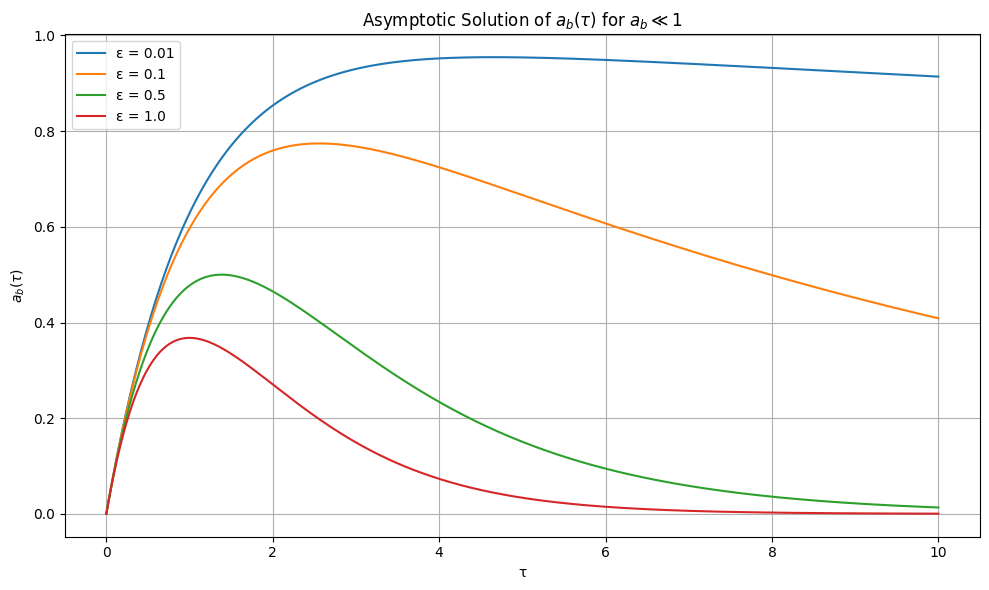

In [2]:
#Non-dimensionalized code for a_b<<1
import numpy as np
import matplotlib.pyplot as plt

# Time domain
tau = np.linspace(0, 10, 500)

# Parameter gamma
gamma = 1.0

# Different values of epsilon to explore asymptotic behavior
epsilons = [0.01, 0.1, 0.5, 1.0]

# Plotting
plt.figure(figsize=(10, 6))

for epsilon in epsilons:
    # Asymptotic (linearized) solution: a_b ~ gamma * (e^{-tau} - e^{-epsilon * tau}) / (epsilon - 1)
    if epsilon == 1.0:
        a_b = gamma * tau * np.exp(-tau)  # Limit case as epsilon -> 1
    else:
        a_b = gamma * (np.exp(-tau) - np.exp(-epsilon * tau)) / (epsilon - 1)

    plt.plot(tau, a_b, label=f'ε = {epsilon}')

plt.title('Asymptotic Solution of $a_b(\\tau)$ for $a_b \\ll 1$')
plt.xlabel('τ')
plt.ylabel('$a_b(τ)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-4-e83478c7989b>:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  a1 = np.trapz(integrand, s, axis=1)


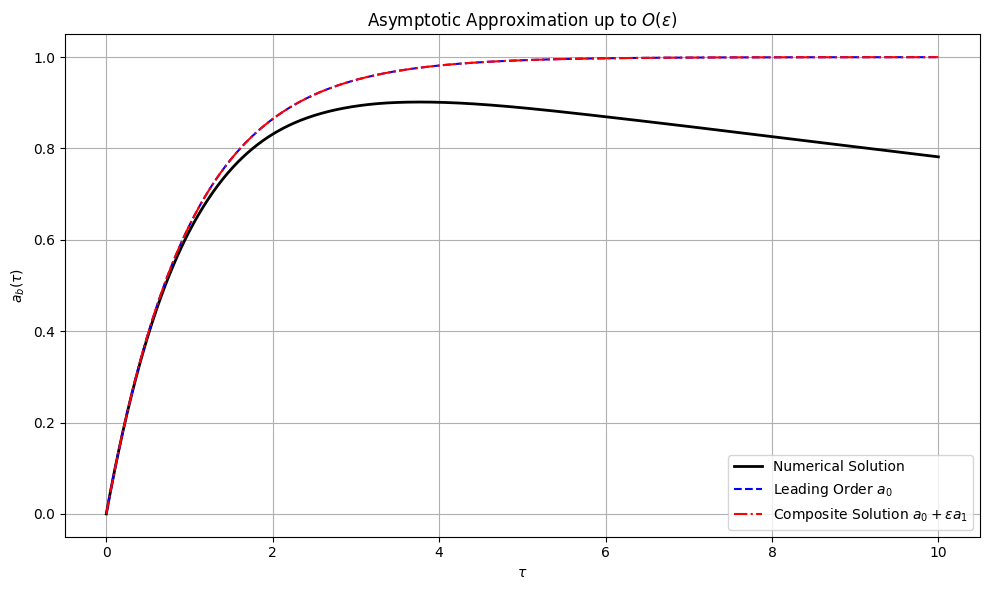

In [4]:
#Non-dimensionalized code for \epsilon <<1
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.05
gamma = 1.0
tau = np.linspace(0, 10, 1000)

# Leading order solution
a0 = gamma * (1 - np.exp(-tau))

# First order correction
s = tau[:, None]  # for broadcasting during integration
integrand = -gamma * (1 - np.exp(-s)) + gamma**2 * (1 - np.exp(-s))**2
a1 = np.trapz(integrand, s, axis=1)

# Composite asymptotic solution up to O(epsilon)
a_approx = a0 + epsilon * a1

# Numerical solution for comparison
from scipy.integrate import solve_ivp

def ode(tau, a):
    return gamma * np.exp(-tau) - epsilon * a / (1 + a)

sol = solve_ivp(ode, [0, 10], [0], t_eval=tau)
a_numeric = sol.y[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tau, a_numeric, label='Numerical Solution', color='black', linewidth=2)
plt.plot(tau, a0, label='Leading Order $a_0$', linestyle='--', color='blue')
plt.plot(tau, a_approx, label='Composite Solution $a_0 + \epsilon a_1$', linestyle='-.', color='red')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$a_b(\tau)$')
plt.title('Asymptotic Approximation up to $O(\epsilon)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
